
### ✅ Task 2: Time Series Forecasting Models
## **ARIMA vs LSTM for TSLA Price Prediction**
- **Analyst**: GMF Investments
- **Date**: August 10, 2025
#### This notebook loads, cleans, and explores financial data for TSLA, BND, and SPY from July 1, 2015, to July 31, 2025.

In [4]:
%pip install tensorflow

  Using cached tensorflow-2.20.0rc0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0rc0-cp313-cp313-win_amd64.whl (332.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/cor

In [2]:
# Load data
prices = pd.read_csv('../data/prices.csv', index_col='Date', parse_dates=True)
tsla = prices['TSLA'].copy().to_frame()

In [3]:
# Train-test split (chronological)
train = tsla[tsla.index < '2024-01-01']
test = tsla[tsla.index >= '2024-01-01']

In [4]:
# Exponential Smoothing (ETS)
# Fit the ETS model
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
ets_forecast = ets_model.forecast(len(test))

# Evaluate ETS
ets_mae = mean_absolute_error(test, ets_forecast)
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))
print(f'ETS MAE: {ets_mae}, RMSE: {ets_rmse}')

c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ETS MAE: 57.94259755681755, RMSE: 69.32060253688972


c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [5]:
# LSTM Model
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled)
X_test, y_test = create_sequences(test_scaled)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.0149
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0028
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0020
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0019
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0018
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0019
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0016
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0019
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0015
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0014
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0013
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0013
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0012
Epo

In [6]:
# Predict
lstm_pred_scaled = model_lstm.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# Ensure 'test' is an independent DataFrame (avoid SettingWithCopyWarning)
test = test.copy()

# Initialize the 'LSTM' column with NaN (if not already present)
test['LSTM'] = np.nan

# Assign predictions starting from the 61st position (index 60) onward
# This assumes len(test) >= 60 + len(lstm_pred)
test.loc[test.index[60:60 + len(lstm_pred)], 'LSTM'] = lstm_pred.flatten()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [7]:
# Evaluate models - Only compare where LSTM predictions exist
# We assume 'LSTM' column has NaNs for the first N rows (due to windowing), then predictions

# Extract aligned true values and predictions
y_lstm = test['LSTM'].dropna()                    # These are your predictions (say, 335 entries)
y_true_aligned = test['TSLA'].loc[y_lstm.index]   # Get true values at the same indices (same 335 entries)
def evaluate(y_true, y_pred, name):
    lstm_mae = mean_absolute_error(y_true, y_pred)
    lstm_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{name} - MAE: ${lstm_mae:.2f}, RMSE: ${lstm_rmse:.2f}, MAPE: {mape:.2f}%")
    return lstm_mae, lstm_rmse, mape

# Evaluate
lstm_mae, lstm_rmse, lstm_mape = evaluate(y_true_aligned, y_lstm, "LSTM")

LSTM - MAE: $10.96, RMSE: $14.91, MAPE: 4.04%


In [8]:
#Model Comparsion 
results = {
    'ETS':(ets_mae,ets_rmse),
    'LSTM':(lstm_mae,lstm_rmse),
}

for model, metrics in results.items():
    print(f"{model} - MAE: {metrics[0]}, RMSE: {metrics[1]}")

ETS - MAE: 57.94259755681755, RMSE: 69.32060253688972
LSTM - MAE: 10.959004689686333, RMSE: 14.905989631947996


Columns in test: ['TSLA', 'LSTM']
⚠️ No ETS forecast column found!


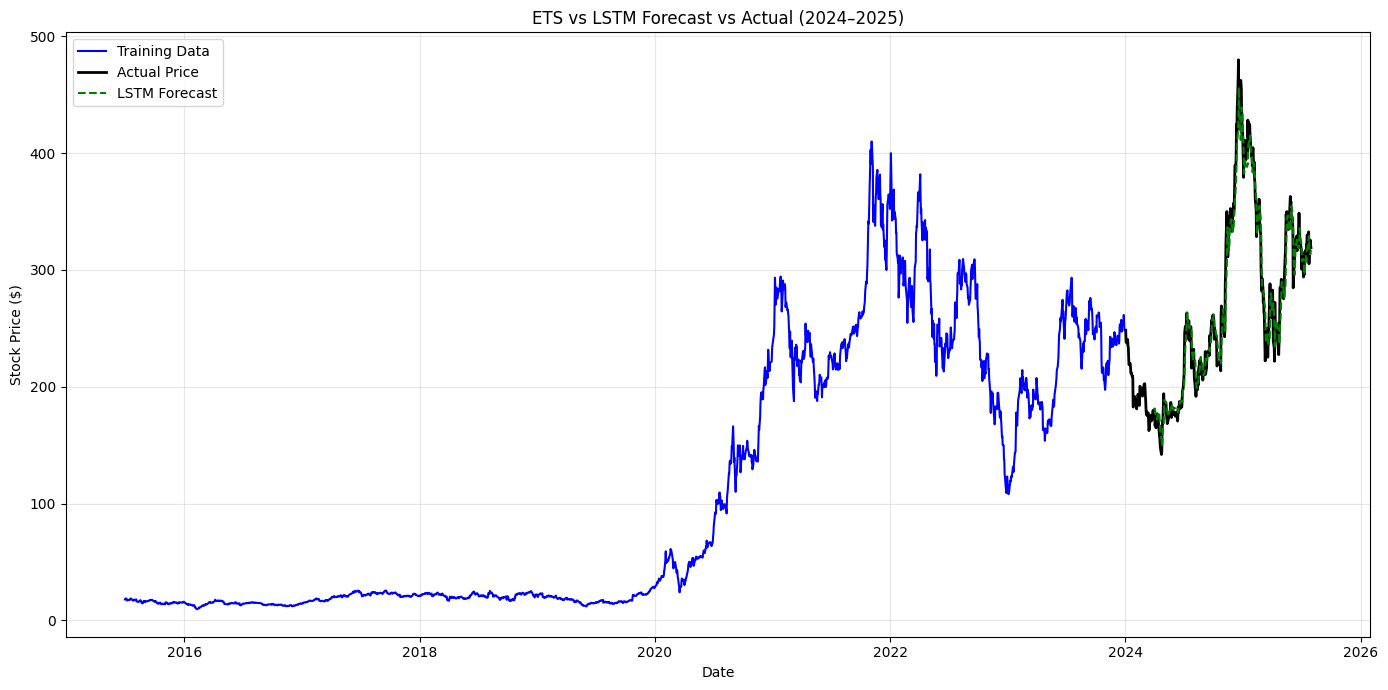

In [10]:
# Debug: Print available columns
print("Columns in test:", test.columns.tolist())

# Plot comparison
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')

# Plot actual test values
plt.plot(test.index, test['TSLA'], label='Actual Price', color='black', linewidth=2)

# Check and plot ETS if available
if 'ETS' in test.columns:
    plt.plot(test.index, test['ETS'], label='ETS Forecast', linestyle='--', color='orange')
elif 'yhat_ets' in test.columns:
    plt.plot(test.index, test['yhat_ets'], label='ETS Forecast', linestyle='--', color='orange')
elif 'ets' in test.columns:
    plt.plot(test.index, test['ets'], label='ETS Forecast', linestyle='--', color='orange')
else:
    print("⚠️ No ETS forecast column found!")

# Plot LSTM forecast
lstm_preds = test['LSTM'].dropna()
if len(lstm_preds) > 0:
    plt.plot(lstm_preds.index, lstm_preds, label='LSTM Forecast', linestyle='--', color='green')
else:
    print("⚠️ No valid LSTM predictions found!")

# Finalize plot
plt.title('ETS vs LSTM Forecast vs Actual (2024–2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Define the columns you want to save (with ETS instead of ARIMA)
expected_cols = ['TSLA', 'ETS', 'LSTM']

# Filter to keep only columns that actually exist in the test DataFrame
available_cols = [col for col in expected_cols if col in test.columns]

# Save if any valid columns found
if available_cols:
    test[available_cols].to_csv('../results/model_predictions.csv')
    print(f"✅ Saved columns {available_cols} to '../results/model_predictions.csv'")
else:
    print("❌ No valid columns found to save. Check if 'ETS', 'LSTM', or 'TSLA' are in the DataFrame.")

print("✅ Models evaluated and results saved.")

✅ Saved columns ['TSLA', 'LSTM'] to '../results/model_predictions.csv'
✅ Models evaluated and results saved.


In [14]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Recompile with explicit loss
model_lstm.compile(optimizer='adam', loss=MeanSquaredError())  # Not 'mse'


In [15]:
# Save the trained LSTM model
model_lstm.save('../models/lstm_model.h5')

# Save the scaler (needed for inverse transform later)
import joblib
joblib.dump(scaler, '../models/scaler.pkl')

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!
